In [1]:
#MATH BEHIND MULTIPLE LINEAR REGRESSION....
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as st

In [37]:
#SAMPLE DATA 4D....
df = pd.read_csv("datasets/Sample4d.csv")
df.head()

,x1,x2,State,y
165349.20,136897.80,471784.10,New York,192261.83
162597.70,151377.59,443898.53,California,191792.06
153441.51,101145.55,407934.54,Florida,191050.39
144372.41,118671.85,383199.62,New York,182901.99
142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
df.drop(columns=["State"], axis=1, inplace=True)
df.head()

,x1,x2,y
165349.20,136897.80,471784.10,192261.83
162597.70,151377.59,443898.53,191792.06
153441.51,101145.55,407934.54,191050.39
144372.41,118671.85,383199.62,182901.99
142107.34,91391.77,366168.42,166187.94


<Axes: xlabel='x1', ylabel='y'>

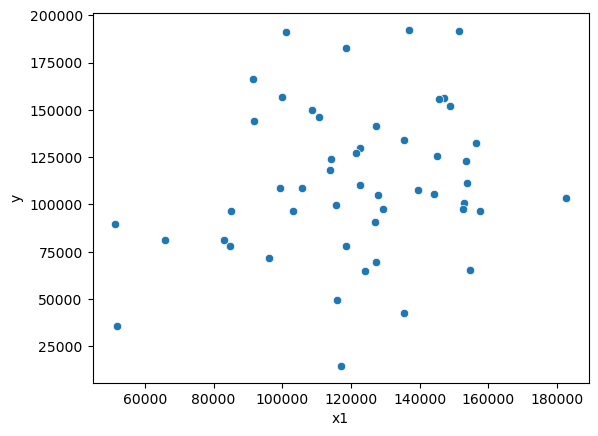

In [26]:
sns.scatterplot(x=df['x1'], y=df['y'])

<Axes: xlabel='x2', ylabel='y'>

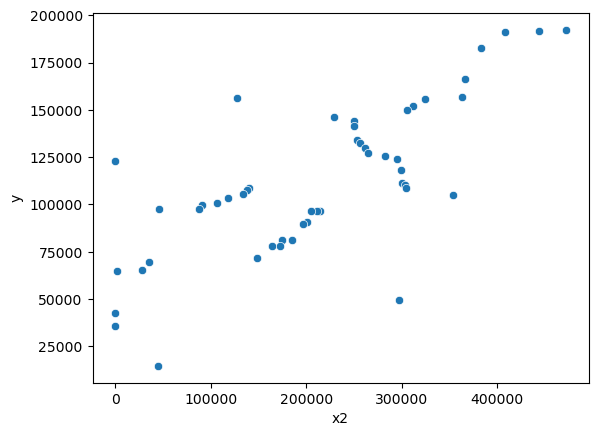

In [27]:
sns.scatterplot(x=df['x2'], y=df['y'])

<Axes: xlabel='x1', ylabel='x2'>

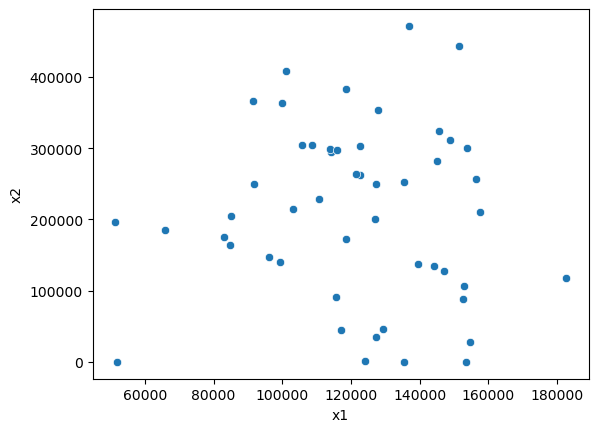

In [28]:
sns.scatterplot(x=df['x1'], y=df['x2'])

In [39]:
#CREATING MATRIX....
y=np.array(df['y'])
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [40]:
features=np.array(df.drop(columns=['y'], axis=1))
features

array([[136897.8 , 471784.1 ],
       [151377.59, 443898.53],
       [101145.55, 407934.54],
       [118671.85, 383199.62],
       [ 91391.77, 366168.42],
       [ 99814.71, 362861.36],
       [147198.87, 127716.82],
       [145530.06, 323876.68],
       [148718.95, 311613.29],
       [108679.17, 304981.62],
       [110594.11, 229160.95],
       [ 91790.61, 249744.55],
       [127320.38, 249839.44],
       [135495.07, 252664.93],
       [156547.42, 256512.92],
       [122616.84, 261776.23],
       [121597.55, 264346.06],
       [145077.58, 282574.31],
       [114175.79, 294919.57],
       [153514.11,      0.  ],
       [113867.3 , 298664.47],
       [153773.43, 299737.29],
       [122782.75, 303319.26],
       [105751.03, 304768.73],
       [ 99281.34, 140574.81],
       [139553.16, 137962.62],
       [144135.98, 134050.07],
       [127864.55, 353183.81],
       [182645.56, 118148.2 ],
       [153032.06, 107138.38],
       [115641.28,  91131.24],
       [152701.92,  88218.23],
       [

In [46]:
X=np.insert(features , 0 ,1 , axis=1)
X

array([[1.0000000e+00, 1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 1.5137759e+05, 4.4389853e+05],
       [1.0000000e+00, 1.0114555e+05, 4.0793454e+05],
       [1.0000000e+00, 1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 9.1391770e+04, 3.6616842e+05],
       [1.0000000e+00, 9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 1.4719887e+05, 1.2771682e+05],
       [1.0000000e+00, 1.4553006e+05, 3.2387668e+05],
       [1.0000000e+00, 1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 1.0867917e+05, 3.0498162e+05],
       [1.0000000e+00, 1.1059411e+05, 2.2916095e+05],
       [1.0000000e+00, 9.1790610e+04, 2.4974455e+05],
       [1.0000000e+00, 1.2732038e+05, 2.4983944e+05],
       [1.0000000e+00, 1.3549507e+05, 2.5266493e+05],
       [1.0000000e+00, 1.5654742e+05, 2.5651292e+05],
       [1.0000000e+00, 1.2261684e+05, 2.6177623e+05],
       [1.0000000e+00, 1.2159755e+05, 2.6434606e+05],
       [1.0000000e+00, 1.4507758e+05, 2.8257431e+05],
       [1.0000000e+00, 1.141

In [47]:
betas= np.linalg.inv(X.T@X) @  X.T@y
print("beat0: {:.3f} \nbeat1: {:.3f} \nbeat2: {:.3f} ".format(betas[0], betas[1], betas[2]))

beat0: 20224.429 
beat1: 0.324 
beat2: 0.249 


In [48]:
#EVALUATE MODEL....
ybar= np.mean(y)
yhat= betas[0] + betas[1]*df['x1'] + betas[2]*df["x2"]
mae = (np.sum(abs(y - yhat)))/len(y)
mse = (np.sum((y - yhat)**2))/len(y)
rmse =  np.sqrt((np.sum((y - yhat)**2))/len(y))
sse = np.sum((y - yhat)**2)
sst = np.sum((y-ybar)**2)
r2= 1- (sse/sst)
print("MAE is : {:.3f}".format(mae))
print("MSE is : {:.3f}".format(mse))
print("RMSE is : {:.3f}".format(rmse))
print("R2 Score is : {:.3f}".format(r2))

MAE is : 18515.321
MSE is : 621358650.900
RMSE is : 24927.067
R2 Score is : 0.610
